In [2]:
from spinup.algos.pytorch.ddpg.ddpg import ReplayBuffer

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
HalfCheetah_file_path = r"C:\Users\Lingheng\Google Drive\git_repos_2020\spinup_data_lstm\2021-04-07_ddpg_HalfCheetahBulletEnv-v0_TestSaveReplayBuff\2021-04-07_17-27-34-ddpg_HalfCheetahBulletEnv-v0_TestSaveReplayBuff_s0\pyt_save\checkpoint-context-Step-99999.pt"
avg_targ_file_path = r"D:\spinup_data_lstm\2021-04-07_ddpg_HalfCheetahBulletEnv-v0_TestAvgWindow\2021-04-07_20-43-06-ddpg_HalfCheetahBulletEnv-v0_TestAvgWindow_s0\pyt_save\checkpoint-context-Step-95999.pt"

In [4]:
HalfCheetah_context_checkpoint = torch.load(HalfCheetah_file_path)
avg_targ_context_checkpoint = torch.load(avg_targ_file_path)

In [5]:
HalfCheetah_replay_buffer = HalfCheetah_context_checkpoint['replay_buffer']
avg_targreplay_buffer = avg_targ_context_checkpoint['replay_buffer']

In [6]:
HalfCheetah_replay_buffer.size

100000

In [4]:
TD3_HalfCheetah_file_path = r"D:\spinup_data_lstm\2021-04-16_td3_HalfCheetahBulletEnv-v0_LogHist\2021-04-16_19-33-18-td3_HalfCheetahBulletEnv-v0_LogHist_s0\pyt_save\checkpoint-context-Step-159999.pt"

In [5]:
TD3_HalfCheetah_context_checkpoint = torch.load(TD3_HalfCheetah_file_path)

In [6]:
TD3_HalfCheetah_replay_buffer = TD3_HalfCheetah_context_checkpoint['replay_buffer']


## Find the reason for overestimationality
* The more positive rewards with random action, the easier to be overestimating.

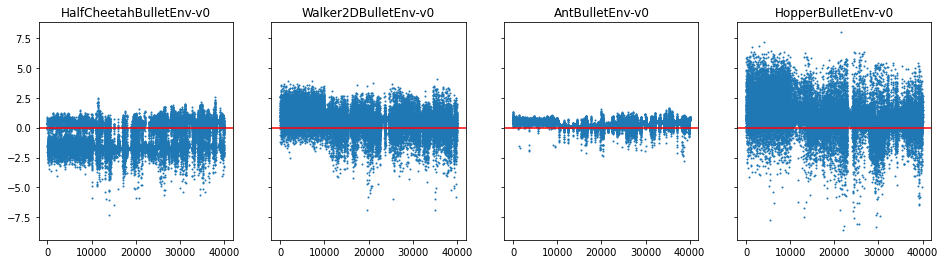

In [160]:
exp_num = 40000
fig, axes = plt.subplots(1,4,sharey=True,figsize=(16,4))
axes[0].scatter(np.arange(exp_num), HalfCheetah_replay_buffer.rew_buf[:exp_num], s=1)
axes[1].scatter(np.arange(exp_num), walker2d_replay_buffer.rew_buf[:exp_num], s=1)
axes[2].scatter(np.arange(exp_num), Ant_replay_buffer.rew_buf[:exp_num], s=1)
axes[3].scatter(np.arange(exp_num), Hopper_replay_buffer.rew_buf[:exp_num], s=1)

axes[0].set_title('HalfCheetahBulletEnv-v0')
axes[1].set_title('Walker2DBulletEnv-v0')
axes[2].set_title('AntBulletEnv-v0')
axes[3].set_title('HopperBulletEnv-v0')

axes[0].axhline(y=0, color='r', linestyle='-')
axes[1].axhline(y=0, color='r', linestyle='-')
axes[2].axhline(y=0, color='r', linestyle='-')
axes[3].axhline(y=0, color='r', linestyle='-')

In [161]:
HalfCheetah_neg_ratio = np.sum(HalfCheetah_replay_buffer.rew_buf[:exp_num]<=0)/exp_num
walker2d_neg_ratio = np.sum((walker2d_replay_buffer.rew_buf[:exp_num])<=0)/exp_num
Ant_neg_ratio = np.sum((Ant_replay_buffer.rew_buf[:exp_num])<=0)/exp_num
Hopper_neg_ratio = np.sum((Hopper_replay_buffer.rew_buf[:exp_num])<=0)/exp_num
print("Original negative reward ratio:")
print("\tHalfCheetah_neg_ratio={}".format(HalfCheetah_neg_ratio))
print("\twalker2d_neg_ratio={}".format(walker2d_neg_ratio))
print("\tAnt_neg_ratio={}".format(Ant_neg_ratio))
print("\tHopper_neg_ratio={}".format(Hopper_neg_ratio))

HalfCheetah_neg_ratio = np.sum(HalfCheetah_replay_buffer.rew_buf[:exp_num]<=0)/exp_num
walker2d_neg_ratio = np.sum((walker2d_replay_buffer.rew_buf[:exp_num]-0.9)<=0)/exp_num
Ant_neg_ratio = np.sum((Ant_replay_buffer.rew_buf[:exp_num]-0.32)<=0)/exp_num
Hopper_neg_ratio = np.sum((Hopper_replay_buffer.rew_buf[:exp_num]-1.27)<=0)/exp_num
print("Tuned negative reward ratio:")
print("\tHalfCheetah_neg_ratio={}".format(HalfCheetah_neg_ratio))
print("\twalker2d_neg_ratio={}".format(walker2d_neg_ratio))
print("\tAnt_neg_ratio={}".format(Ant_neg_ratio))
print("\tHopper_neg_ratio={}".format(Hopper_neg_ratio))

Original negative reward ratio:
	HalfCheetah_neg_ratio=0.668925
	walker2d_neg_ratio=0.216175
	Ant_neg_ratio=0.058225
	Hopper_neg_ratio=0.18765
Tuned negative reward ratio:
	HalfCheetah_neg_ratio=0.668925
	walker2d_neg_ratio=0.6695
	Ant_neg_ratio=0.4599
	Hopper_neg_ratio=0.66955


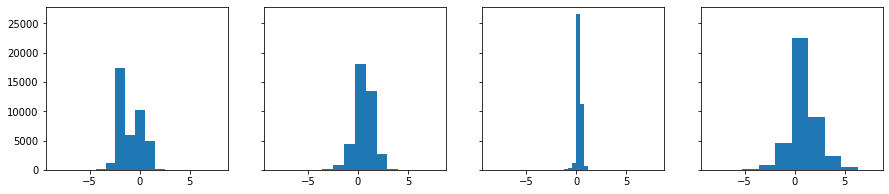

In [115]:
fig, axes = plt.subplots(1,4,figsize=(15,3),sharex='all',sharey='all')
_ = axes[0].hist(HalfCheetah_replay_buffer.rew_buf[:exp_num], bins=10)
_ = axes[1].hist(walker2d_replay_buffer.rew_buf[:exp_num], bins=10)
_ = axes[2].hist(Ant_replay_buffer.rew_buf[:exp_num], bins=10)
_ = axes[3].hist(Hopper_replay_buffer.rew_buf[:exp_num], bins=10)

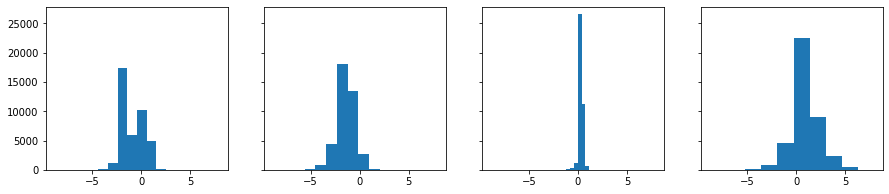

In [117]:
fig, axes = plt.subplots(1,4,figsize=(15,3),sharex='all',sharey='all')
_ = axes[0].hist(HalfCheetah_replay_buffer.rew_buf[:exp_num], bins=10)
_ = axes[1].hist(walker2d_replay_buffer.rew_buf[:exp_num]-2, bins=10)
_ = axes[2].hist(Ant_replay_buffer.rew_buf[:exp_num], bins=10)
_ = axes[3].hist(Hopper_replay_buffer.rew_buf[:exp_num], bins=10)

In [ ]:
exp_num = 40000
fig, axes = plt.subplots(1,1)
# axes[0].scatter(np.arange(exp_num), replay_buffer.rew_buf[:exp_num], s=1)
# axes[1].scatter(np.arange(exp_num), walker2d_replay_buffer.rew_buf[:exp_num], s=1)
# axes[2].scatter(np.arange(exp_num), Ant_replay_buffer.rew_buf[:exp_num], s=1)
axes.boxplot([HalfCheetah_replay_buffer.rew_buf[:exp_num], 
              walker2d_replay_buffer.rew_buf[:exp_num],
              Ant_replay_buffer.rew_buf[:exp_num], Hopper_replay_buffer.rew_buf[:exp_num]])

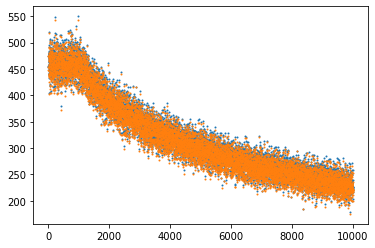

In [34]:
exp_num = 10000
fig, axes = plt.subplots(1,1,sharey=True)
axes.scatter(np.arange(exp_num), HalfCheetah_replay_buffer.sampled_num_buf[:exp_num], s=1)
axes.scatter(np.arange(exp_num), avg_targreplay_buffer.sampled_num_buf[:exp_num], s=1)

In [31]:
for i in range(0, 1000):
    print(len(avg_targreplay_buffer.targ_next_q_buf[i]))
    print(avg_targreplay_buffer.sampled_num_buf[i])
    print('************')
# len(replay_buffer.targ_next_q_buf[i])

896
448.0
************
908
454.0
************
950
475.0
************
882
441.0
************
870
435.0
************
930
465.0
************
944
472.0
************
902
451.0
************
948
474.0
************
954
477.0
************
892
446.0
************
932
466.0
************
912
456.0
************
960
480.0
************
1036
518.0
************
874
437.0
************
978
489.0
************
914
457.0
************
876
438.0
************
962
481.0
************
946
473.0
************
918
459.0
************
954
477.0
************
936
468.0
************
946
473.0
************
934
467.0
************
806
403.0
************
908
454.0
************
948
474.0
************
852
426.0
************
882
441.0
************
940
470.0
************
874
437.0
************
954
477.0
************
880
440.0
************
982
491.0
************
926
463.0
************
948
474.0
************
1006
503.0
************
938
469.0
************
934
467.0
************
900
450.0
************
886
443.0
************
998
499.0

880
440.0
************
948
474.0
************
910
455.0
************
966
483.0
************
856
428.0
************
898
449.0
************
974
487.0
************
852
426.0
************
862
431.0
************
910
455.0
************
928
464.0
************
918
459.0
************
938
469.0
************
876
438.0
************
866
433.0
************
946
473.0
************
942
471.0
************
906
453.0
************
980
490.0
************
922
461.0
************
920
460.0
************
902
451.0
************
948
474.0
************
924
462.0
************
956
478.0
************
988
494.0
************
946
473.0
************
876
438.0
************
882
441.0
************
924
462.0
************
902
451.0
************
876
438.0
************
1002
501.0
************
858
429.0
************
924
462.0
************
918
459.0
************
944
472.0
************
904
452.0
************
910
455.0
************
910
455.0
************
932
466.0
************
870
435.0
************
896
448.0
************
936
468.0


Text(0.5, 0, 'Sampled Count')

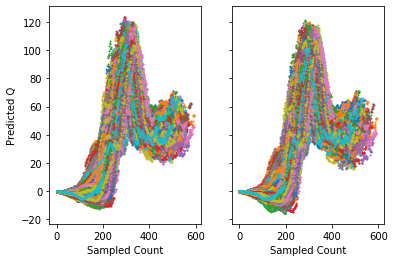

In [7]:
fig, axes = plt.subplots(1,2,sharey=True)
for i in range(0, 1000):
    axes[0].scatter(np.arange(0, len(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i])), TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i], s=1)
    axes[1].scatter(np.arange(0, len(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i])), TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i], s=1)
    
axes[0].set_ylabel('Predicted Q')
axes[0].set_xlabel('Sampled Count')
axes[1].set_xlabel('Sampled Count')

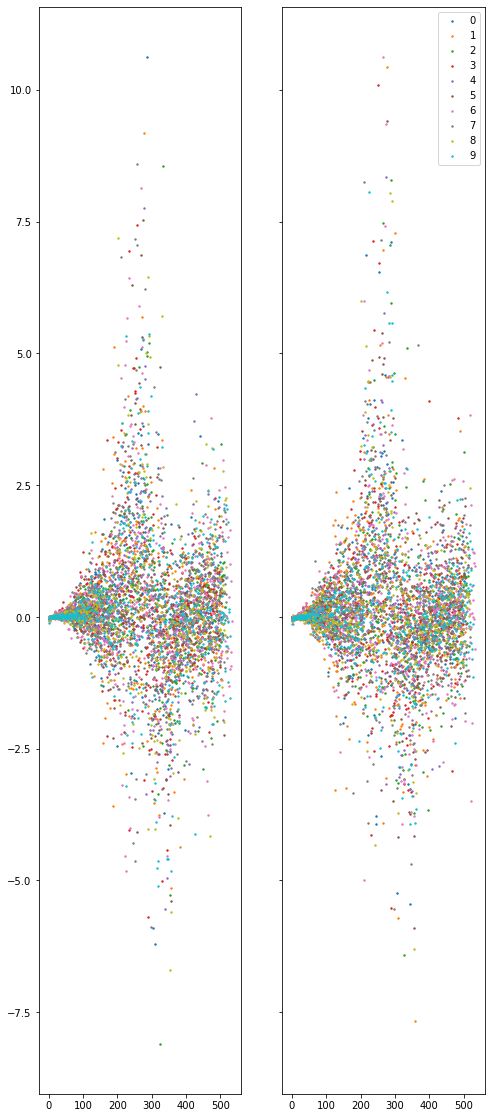

In [8]:
fig, axes = plt.subplots(1,2, figsize=(8,20), sharey=True)
for i in range(10):
    axes[0].scatter(np.arange(0, len(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i])-1), 
                       np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i][1:]) - np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i][0:-1]), s=2)
    axes[1].scatter(np.arange(0, len(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i])-1), 
                       np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i][1:]) - np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i][0:-1]), s=2)
    
# axes.set_yticks(np.arange(-10, 25, 0.5))
axes[1].legend(['{}'.format(i) for i in range(10)])

In [15]:
np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i])

array([ 50.394363,  51.441532,  50.812675,  50.152622,  50.70938 ,
        51.7496  ,  50.348385,  47.595943,  47.520622,  49.006203,
        49.508884,  49.697704,  48.507996,  47.64506 ,  46.10135 ,
        50.997715,  52.629505,  51.950912,  55.085735,  54.328255,
        53.7183  ,  56.178352,  53.998436,  56.98691 ,  60.168358,
        61.07351 ,  60.61729 ,  60.28295 ,  62.342464,  61.846455,
        63.31985 ,  68.31007 ,  67.3015  ,  70.931595,  70.44553 ,
        76.63434 ,  78.342514,  78.07167 ,  80.36946 ,  77.98154 ,
        82.05207 ,  81.541916,  82.45326 ,  82.50897 ,  85.06993 ,
        84.96237 ,  83.55237 ,  84.643105,  87.56077 ,  87.44169 ,
        89.37737 ,  89.25227 ,  90.14982 ,  90.348236,  90.809715,
        90.06792 ,  91.373245,  91.90955 ,  91.84445 ,  94.436935,
        93.66454 ,  92.99523 ,  95.80357 ,  98.51211 , 101.206726,
       101.081276, 100.33771 , 103.41856 , 103.12238 , 103.89275 ,
       102.584   , 102.41499 , 104.51215 , 104.094025, 103.790

In [17]:
min_targ_next_q = np.minimum(np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i]), np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i]))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,
         2.,  2.,  3.,  0.,  6.,  4.,  3.,  5.,  7., 14., 17., 27., 25.,
        36., 25., 21., 13., 19., 13.,  6.,  4.,  2.,  3.,  2.,  1.,  6.,
         2.,  2.,  1.,  4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-10.444252  , -10.244873  , -10.045494  ,  -9.846116  ,
         -9.646737  ,  -9.447358  ,  -9.247979  ,  -9.048601  ,
         -8.849222  ,  -8.649843  ,  -8.450464  ,  -8.251086  ,
         -8.051707  ,  -7.8523283 ,  -7.65295   ,  -7.453571  ,
         -7.2541924 ,  -7.0548134 ,  -6.855435  ,  -6.656056  ,
         -6.4566774 ,  -6.2572985 ,  -6.05792   ,  -5.858541  ,
         -5.6591625 ,  -5.4597836 ,  -5.2604046 , 

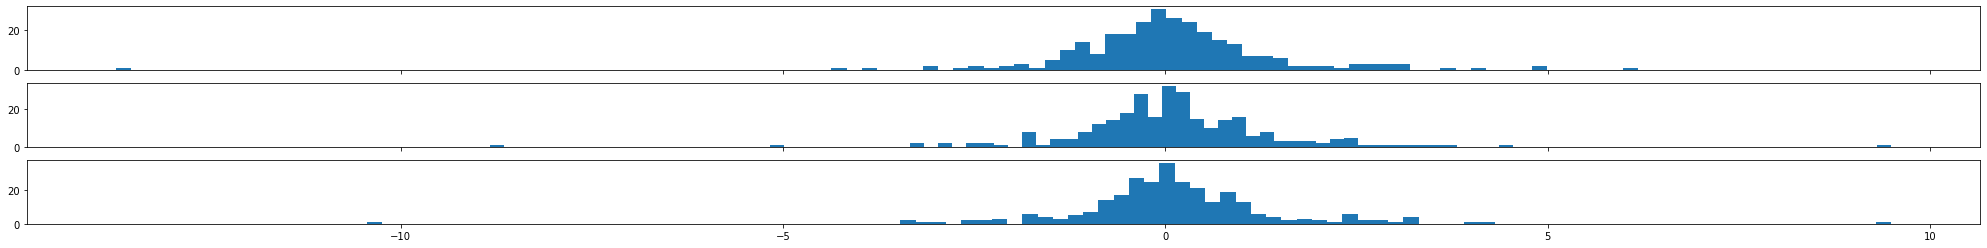

In [18]:
fig, axes = plt.subplots(3,1,figsize=(35,4), sharex=True)
i=10000
axes[0].hist(np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i][1:]) - np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q1_buf[i][0:-1]),
          bins=100)
axes[1].hist(np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i][1:]) - np.asarray(TD3_HalfCheetah_replay_buffer.targ_next_q2_buf[i][0:-1]),
          bins=100)
axes[2].hist(min_targ_next_q[1:] - min_targ_next_q[0:-1],
          bins=100)
# axes.set_xticks(np.arange(-10, 25, 0.5))

Text(0.5, 0, 'Sampled Count')

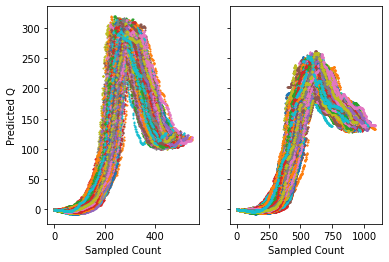

In [15]:
fig, axes = plt.subplots(1,2,sharey=True)
for i in range(0, 1000):
    axes[0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])), HalfCheetah_replay_buffer.targ_next_q_buf[i], s=1)
    axes[1].scatter(np.arange(0, len(avg_targreplay_buffer.targ_next_q_buf[i])), avg_targreplay_buffer.targ_next_q_buf[i], s=1)
    
axes[0].set_ylabel('Predicted Q')
axes[0].set_xlabel('Sampled Count')
axes[1].set_xlabel('Sampled Count')

In [49]:
HalfCheetah_replay_buffer.size

100000

In [55]:
np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[50000][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[50000][0:-1])

array([-4.6519928e+00, -1.1108398e-02,  8.3465576e-03, -1.3108826e+00,
       -4.7474518e+00, -1.4791260e+00, -1.1968384e+00, -8.8027954e-02,
       -1.8138123e-01, -5.6813049e-01, -2.9911804e-01, -3.3529816e+00,
       -3.5745239e-01, -1.4322205e+00, -5.0178528e-01, -2.9342651e-01,
       -7.0150757e-01, -1.2494812e+00, -1.7330933e+00, -5.3253174e-02,
        4.8458862e-01, -7.2889709e-01, -1.6780090e+00, -9.3858337e-01,
       -4.3960571e-02, -2.0478821e-01, -4.8513794e-01,  9.1749573e-01,
       -1.3525848e+00, -6.8595886e-01, -2.0159912e-01, -4.1906738e-01,
       -1.1753845e-01, -5.4896545e-01,  4.5852661e-02, -2.1301270e-02,
       -1.7381287e-01,  2.8053284e+00,  3.9631653e-01,  8.3308411e-01,
       -3.8909912e-02, -5.0129700e-01,  7.5627136e-01, -5.3070068e-02,
       -5.4757690e-01,  1.9902039e-01, -3.6331177e-02, -6.0516357e-02,
       -4.1305542e-02,  3.2043457e-04,  9.6025085e-01,  4.5825195e-01,
        3.3030701e-01,  1.0381927e+00,  1.6149902e-01, -1.4129791e+00,
      

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  2.,  1.,  1.,  0.,  2.,  3.,  0.,  1.,  3.,
         1.,  3.,  0.,  2.,  3.,  5.,  3.,  3.,  8.,  8.,  8., 14., 14.,
        28., 30., 25., 13., 13.,  4.,  3.,  2.,  5.,  2.,  2.,  1.,  2.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.]),
 array([-13.247238  , -13.04836   , -12.849482  , -12.650603  ,
        -12.451725  , -12.252847  , -12.053968  , -11.85509   ,
        -11.656212  , -11.457334  , -11.258455  , -11.059577  ,
        -10.860699  , -10.661819  , -10.462941  , -10.264063  ,
        -10.065185  ,  -9.866306  ,  -9.667428  ,  -9.46855   ,
         -9.269671  ,  -9.070793  ,  -8.871915  ,  -8.673037  ,
         -8.474158  ,  -8.27528   ,  -8.076402  , 

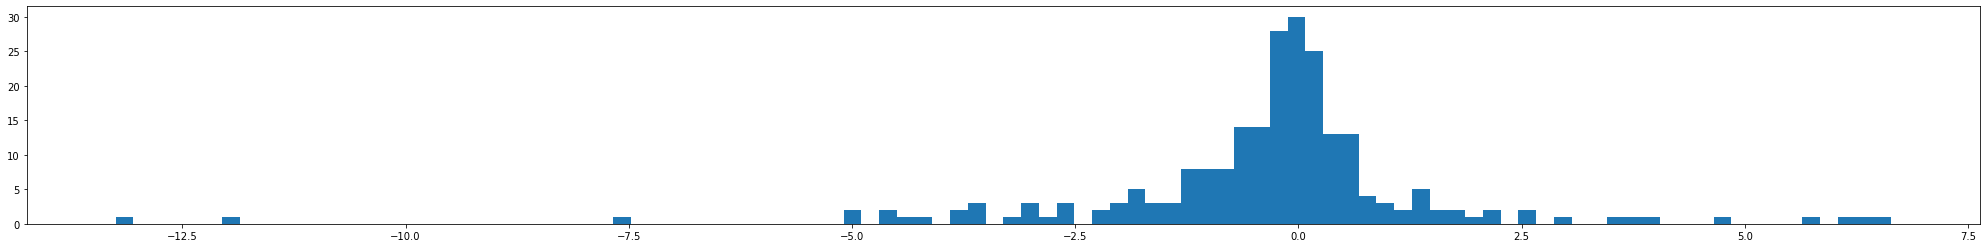

In [103]:
fig, axes = plt.subplots(1,1,figsize=(35,4), sharey=True)
i=10000
axes.hist(np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]),
          bins=100)
# axes.set_xticks(np.arange(-10, 25, 0.5))

{'whiskers': [<matplotlib.lines.Line2D at 0x2c961504388>,
 'caps': [<matplotlib.lines.Line2D at 0x2c9614f6308>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c9614f6c88>,
 'medians': [<matplotlib.lines.Line2D at 0x2c9614f0408>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c9614f0088>,
 'means': []}

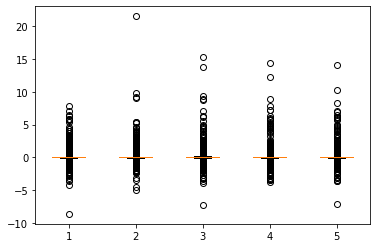

In [54]:
exp_num = 40000
fig, axes = plt.subplots(1,1)
# axes[0].scatter(np.arange(exp_num), replay_buffer.rew_buf[:exp_num], s=1)
# axes[1].scatter(np.arange(exp_num), walker2d_replay_buffer.rew_buf[:exp_num], s=1)
# axes[2].scatter(np.arange(exp_num), Ant_replay_buffer.rew_buf[:exp_num], s=1)
axes.boxplot([np.asarray(avg_targreplay_buffer.targ_next_q_buf[i][1:]) - np.asarray(avg_targreplay_buffer.targ_next_q_buf[i][0:-1]) for i in range(5)])

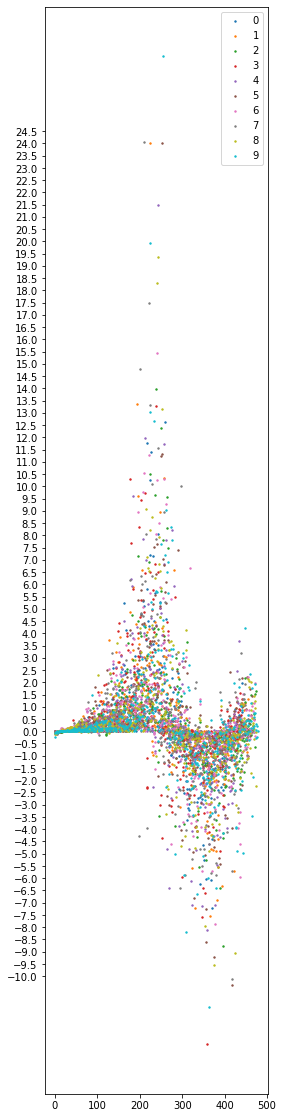

In [8]:
fig, axes = plt.subplots(1,1, figsize=(4,20))
for i in range(10):
    axes.scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1), 
                       np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]), s=2)
    
axes.set_yticks(np.arange(-10, 25, 0.5))
axes.legend(['{}'.format(i) for i in range(10)])

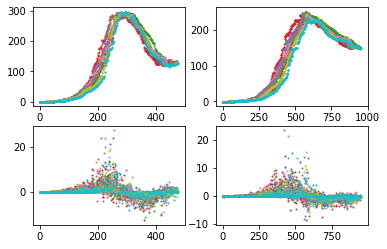

In [9]:
fig, axes = plt.subplots(2,2)
for i in range(10):
    # Predicted 
    axes[0][0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])), HalfCheetah_replay_buffer.targ_next_q_buf[i], s=1)
    
    # Difference
    axes[1][0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1), 
              np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]), s=1)
    
    # Predicted 
    axes[0][1].scatter(np.arange(0, len(avg_targreplay_buffer.targ_next_q_buf[i])), avg_targreplay_buffer.targ_next_q_buf[i], s=1)
    
    # Difference
    axes[1][1].scatter(np.arange(0, len(avg_targreplay_buffer.targ_next_q_buf[i])-1), 
              np.asarray(avg_targreplay_buffer.targ_next_q_buf[i][1:]) - np.asarray(avg_targreplay_buffer.targ_next_q_buf[i][0:-1]), s=1)

In [63]:
window_size = 3
moving_averages = []
i = 0
data = np.asarray(replay_buffer.targ_next_q_buf[i])

while i < len(data) - window_size + 1:
    this_window = data[i : i + window_size]
    window_average = sum(this_window) / window_size
    moving_averages.append(window_average)
    i += 1

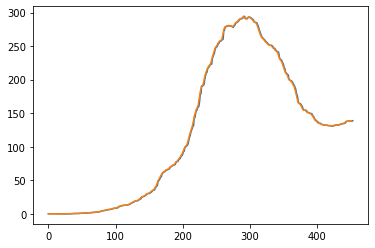

In [66]:
fig, axes = plt.subplots(1,1)
axes.plot(np.arange(len(data)), data)
axes.plot(np.arange(len(moving_averages)), moving_averages)

# Walker2DBulletEnv-v0

In [29]:
walker2d_file_path = r"D:\spinup_data_lstm\2021-04-08_ddpg_Walker2DBulletEnv-v0_LogReplayBuf\2021-04-08_20-43-27-ddpg_Walker2DBulletEnv-v0_LogReplayBuf_s0\pyt_save\checkpoint-context-Step-99999.pt"

In [30]:
walker2d_context_checkpoint = torch.load(walker2d_file_path)

In [31]:
walker2d_replay_buffer = walker2d_context_checkpoint['replay_buffer']

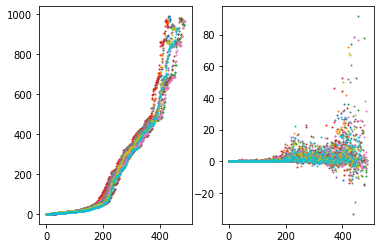

In [11]:
fig, axes = plt.subplots(1,2)
for i in range(10):
    # Predicted 
    axes[0].scatter(np.arange(0, len(walker2d_replay_buffer.targ_next_q_buf[i])), walker2d_replay_buffer.targ_next_q_buf[i], s=1)
    
    # Difference
    axes[1].scatter(np.arange(0, len(walker2d_replay_buffer.targ_next_q_buf[i])-1), 
              np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][0:-1]), s=1)
    

array([ 0.8883031 ,  0.32388565,  0.34079754,  0.27694592,  0.42060772,
       -0.12116436,  0.01595561, -0.11313821, -0.00334215,  0.38625056,
        0.2624334 ,  0.66593367,  0.05195126,  0.7848179 ,  0.7389105 ,
       -2.041058  ,  0.07506765,  0.48604113,  0.3564258 ,  0.5877927 ,
        0.30193436, -1.4226475 , -1.5727463 , -1.6542327 , -1.9681438 ,
       -2.105544  , -1.2946247 , -1.5568031 , -1.5689945 , -1.4361254 ,
       -1.5291407 , -1.3778287 , -1.701877  , -1.4764974 , -1.7177206 ,
       -1.8238925 , -1.7136716 , -1.7461833 , -1.4519856 , -1.5346274 ,
       -1.5422353 , -1.6427869 , -1.6280304 , -2.3382227 , -1.6618699 ,
       -1.6920394 , -1.5104461 , -1.3631049 , -1.3982623 , -1.5666693 ,
       -1.4787565 , -1.8000599 , -1.8494906 , -1.9077342 , -1.7342247 ,
       -1.9878304 , -1.9543786 , -2.595416  , -2.0228715 , -1.841263  ,
       -1.8782121 , -1.9289683 , -2.2591424 , -2.438359  , -2.9185693 ,
       -2.2483    , -2.8856597 , -0.7972367 , -1.0363197 , -0.83

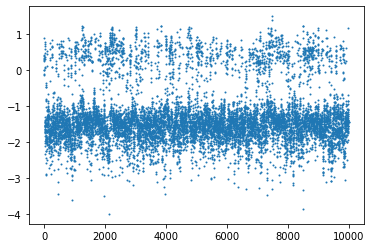

In [24]:
exp_num = 10000
fig, axes = plt.subplots(1,1)
axes.scatter(np.arange(exp_num), replay_buffer.rew_buf[:exp_num], s=1)

## AntBulletEnv-v0

In [156]:
Ant_file_path = r"D:\spinup_data_lstm\2021-04-09_ddpg_AntBulletEnv-v0_LogReplayBuf\2021-04-09_18-38-59-ddpg_AntBulletEnv-v0_LogReplayBuf_s0\pyt_save\checkpoint-context-Step-39999.pt"
# "D:\spinup_data_lstm\2021-04-13_ddpg_AntBulletEnv-v0_LogReplayBuf\2021-04-13_17-07-50-ddpg_AntBulletEnv-v0_LogReplayBuf_s0\pyt_save"

In [157]:
Ant_context_checkpoint = torch.load(Ant_file_path)

In [158]:
Ant_replay_buffer = Ant_context_checkpoint['replay_buffer']

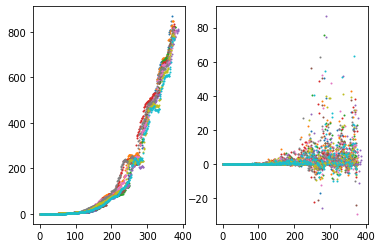

In [159]:
fig, axes = plt.subplots(1,2)
for i in range(10):
    # Predicted 
    axes[0].scatter(np.arange(0, len(Ant_replay_buffer.targ_next_q_buf[i])), Ant_replay_buffer.targ_next_q_buf[i], s=1)
    
    # Difference
    axes[1].scatter(np.arange(0, len(Ant_replay_buffer.targ_next_q_buf[i])-1), 
              np.asarray(Ant_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Ant_replay_buffer.targ_next_q_buf[i][0:-1]), s=1)
    

## HopperBulletEnv-v0

In [15]:
Hopper_file_path = r"D:\spinup_data_lstm\2021-04-09_ddpg_HopperBulletEnv-v0_LogReplayBuf\2021-04-09_20-19-04-ddpg_HopperBulletEnv-v0_LogReplayBuf_s0\pyt_save\checkpoint-context-Step-59999.pt"

In [16]:
Hopper_context_checkpoint = torch.load(Hopper_file_path)

In [17]:
Hopper_replay_buffer = Hopper_context_checkpoint['replay_buffer']

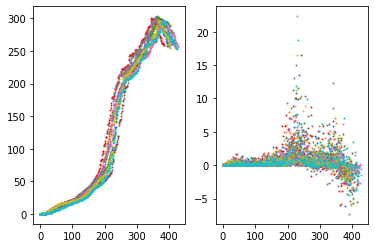

In [18]:
fig, axes = plt.subplots(1,2)
for i in range(10):
    # Predicted 
    axes[0].scatter(np.arange(0, len(Hopper_replay_buffer.targ_next_q_buf[i])), Hopper_replay_buffer.targ_next_q_buf[i], s=1)
    
    # Difference
    axes[1].scatter(np.arange(0, len(Hopper_replay_buffer.targ_next_q_buf[i])-1), 
              np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][0:-1]), s=1)
    

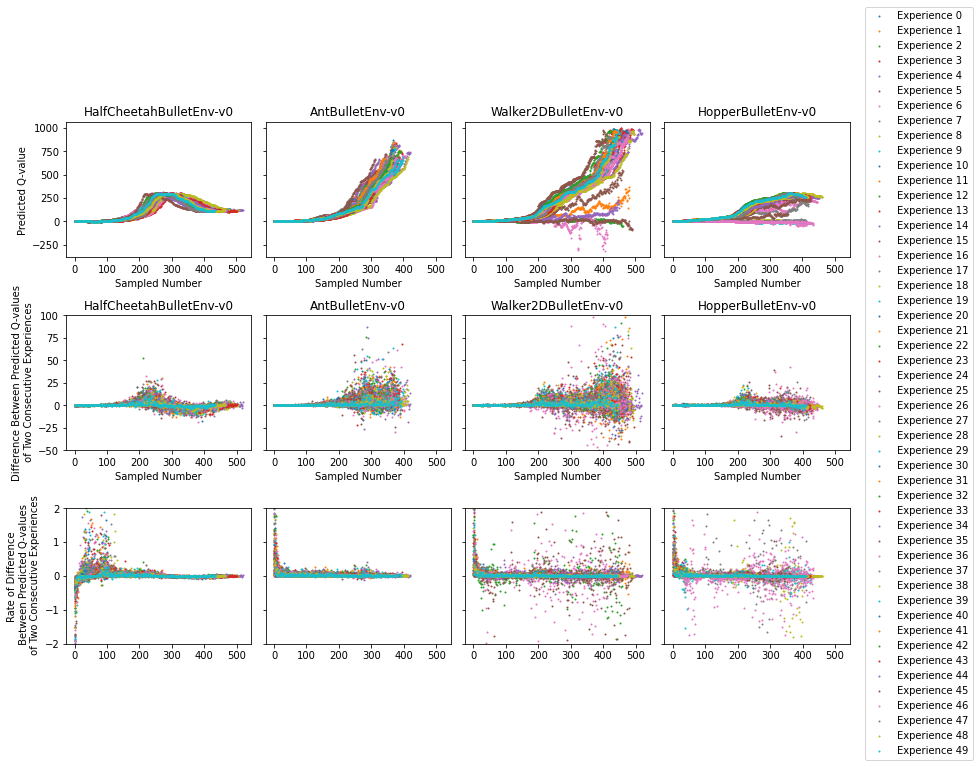

In [162]:
fig, axes = plt.subplots(3,4, figsize=(12,8), sharey='row', sharex='row')
plot_exp_num = 50
start_exp_id = 0
marker_size = 1
for i in range(start_exp_id, start_exp_id+plot_exp_num):
    # Predicted 
    axes[0][0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])), HalfCheetah_replay_buffer.targ_next_q_buf[i], s=marker_size)
    axes[0][1].scatter(np.arange(0, len(Ant_replay_buffer.targ_next_q_buf[i])), Ant_replay_buffer.targ_next_q_buf[i], s=marker_size)
    axes[0][2].scatter(np.arange(0, len(walker2d_replay_buffer.targ_next_q_buf[i])), walker2d_replay_buffer.targ_next_q_buf[i], s=marker_size)
    axes[0][3].scatter(np.arange(0, len(Hopper_replay_buffer.targ_next_q_buf[i])), Hopper_replay_buffer.targ_next_q_buf[i], s=marker_size)
                    
    # Difference
    axes[1][0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1), 
                       np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]), s=marker_size)
    axes[1][1].scatter(np.arange(0, len(Ant_replay_buffer.targ_next_q_buf[i])-1), 
                       np.asarray(Ant_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Ant_replay_buffer.targ_next_q_buf[i][0:-1]), s=marker_size)
    axes[1][2].scatter(np.arange(0, len(walker2d_replay_buffer.targ_next_q_buf[i])-1), 
                       np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][0:-1]), s=marker_size)
    axes[1][3].scatter(np.arange(0, len(Hopper_replay_buffer.targ_next_q_buf[i])-1), 
                       np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][0:-1]), s=marker_size)

    # Difference
    axes[2][0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1), 
                       (np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1])), s=marker_size)
    axes[2][1].scatter(np.arange(0, len(Ant_replay_buffer.targ_next_q_buf[i])-1), 
                       (np.asarray(Ant_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Ant_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(Ant_replay_buffer.targ_next_q_buf[i][0:-1])), s=marker_size)
    axes[2][2].scatter(np.arange(0, len(walker2d_replay_buffer.targ_next_q_buf[i])-1), 
                       (np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(walker2d_replay_buffer.targ_next_q_buf[i][0:-1])), s=marker_size)
    axes[2][3].scatter(np.arange(0, len(Hopper_replay_buffer.targ_next_q_buf[i])-1), 
                       (np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(Hopper_replay_buffer.targ_next_q_buf[i][0:-1])), s=marker_size)

    
fig.legend(['Experience {}'.format(i) for i in range(plot_exp_num)], loc='center left', bbox_to_anchor=(1, 0.5))

axes[1][0].set_ylim(-50, 100)
axes[2][0].set_ylim(-2, 2)
axes[0][0].set_ylabel('Predicted Q-value')
axes[1][0].set_ylabel('Difference Between Predicted Q-values\n of Two Consecutive Experiences')
axes[2][0].set_ylabel('Rate of Difference\n Between Predicted Q-values\n of Two Consecutive Experiences')
axes[0][0].set_xlabel('Sampled Number')
axes[0][1].set_xlabel('Sampled Number')
axes[0][2].set_xlabel('Sampled Number')
axes[0][3].set_xlabel('Sampled Number')
axes[1][0].set_xlabel('Sampled Number')
axes[1][1].set_xlabel('Sampled Number')
axes[1][2].set_xlabel('Sampled Number')
axes[1][3].set_xlabel('Sampled Number')

axes[0][0].set_title('HalfCheetahBulletEnv-v0')
axes[0][1].set_title('AntBulletEnv-v0')
axes[0][2].set_title('Walker2DBulletEnv-v0')
axes[0][3].set_title('HopperBulletEnv-v0')
axes[1][0].set_title('HalfCheetahBulletEnv-v0')
axes[1][1].set_title('AntBulletEnv-v0')
axes[1][2].set_title('Walker2DBulletEnv-v0')
axes[1][3].set_title('HopperBulletEnv-v0')

fig.tight_layout()

(array([  1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   3.,   5.,   2.,
        249., 134.,  31.,   9.,   7.,   1.,   2.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.51682377, -0.47324118, -0.42965856, -0.38607597, -0.34249339,
        -0.29891077, -0.25532818, -0.21174558, -0.16816297, -0.12458038,
        -0.08099778, -0.03741518,  0.00616742,  0.04975002,  0.09333262,
         0.13691522,  0.18049783,  0.22408041,  0.267663  ,  0.31124562,
         0.3548282 ,  0.39

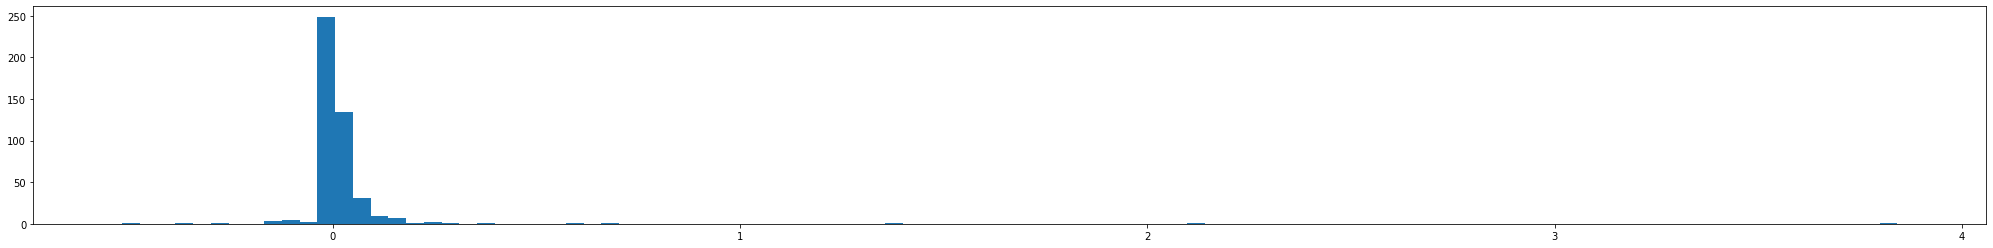

In [78]:
fig, axes = plt.subplots(1,1,figsize=(35,4), sharey=True)
i=0
axes.hist((np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1])),
          bins=100)

array([ 1.39819354e-01,  5.28728962e-02,  2.61271894e-02,  4.67956066e-04,
       -6.36152923e-02,  7.20527172e-02, -1.63143873e-02,  4.62153554e-03,
        2.94154882e-03,  9.03493166e-03, -2.97808647e-03,  3.07083130e-03,
        2.22235918e-03,  1.43337250e-03,  3.68094444e-03, -1.63412094e-03,
        6.68758154e-03, -7.32374191e-03,  2.66396999e-02, -1.34483576e-02,
       -8.28212500e-03,  8.01855326e-03, -1.31863058e-02,  1.65291429e-02,
       -1.54010355e-02, -1.95527077e-03,  1.53611600e-02,  1.44457221e-02,
        1.88156962e-02, -1.45153701e-02, -2.11602747e-02, -4.43497300e-03,
       -2.87054479e-03, -4.10127640e-03,  1.40489787e-02, -8.34575295e-03,
        3.14116776e-02,  1.18049234e-02, -4.74460721e-02, -5.19554317e-03,
        3.96099612e-02, -3.68058607e-02,  8.03925246e-02,  3.08233574e-02,
       -5.71819171e-02, -4.88487929e-02,  1.18038654e-02, -1.39126182e-03,
        5.66115975e-02, -6.89797848e-02,  1.56066120e-02,  7.79463351e-02,
       -8.56878161e-02,  

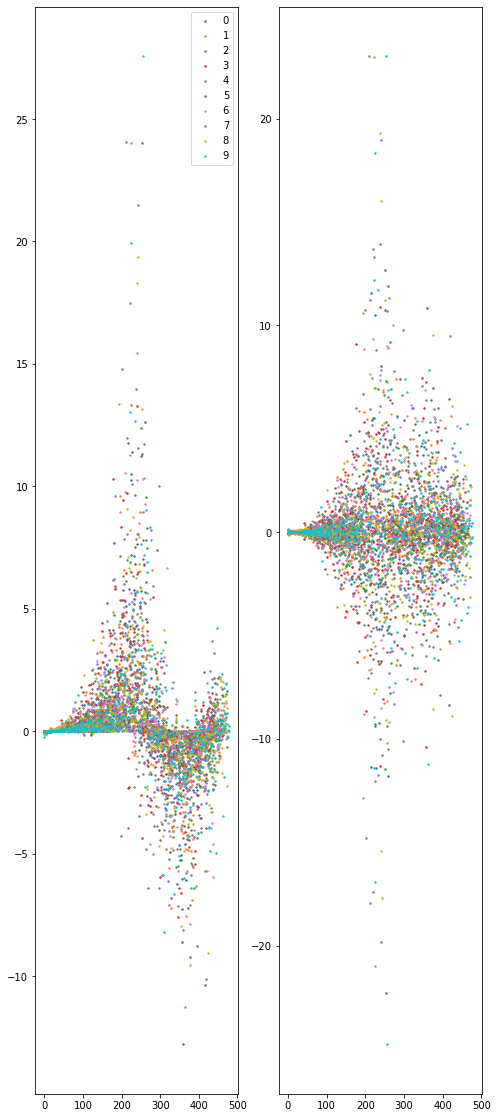

In [96]:
fig, axes = plt.subplots(1,2, figsize=(8,20))

for i in range(10):
    speed = (np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]))
    axes[0].scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1),
                 speed, s=2)
    accelarate = speed[1:]-speed[:-1]
    axes[1].scatter(np.arange(len(accelarate)), accelarate, s=2)
# axes.set_yticks(np.arange(-1, 1, 0.05))
# axes.set_ylim(-1,1)
axes[0].legend(['{}'.format(i) for i in range(10)])

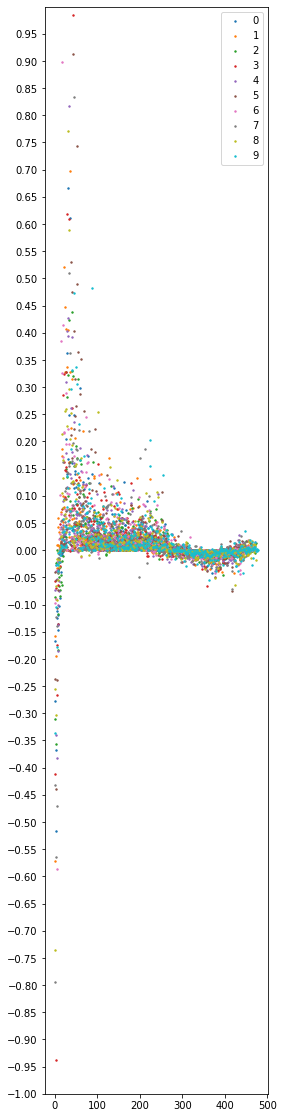

In [87]:
fig, axes = plt.subplots(1,1, figsize=(4,20))
speed = (np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]))
for i in range(10):
    axes.scatter(np.arange(0, len(HalfCheetah_replay_buffer.targ_next_q_buf[i])-1),
                 (np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][1:]) - np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1]))/np.abs(np.asarray(HalfCheetah_replay_buffer.targ_next_q_buf[i][0:-1])), s=2)
    
axes.set_yticks(np.arange(-1, 1, 0.05))
axes.set_ylim(-1,1)
axes.legend(['{}'.format(i) for i in range(10)])